In [36]:
import numpy as np
import matplotlib.pyplot as plt

Triangle Splitting

In [37]:
lpontos=[[2,10],[3,3],[4.5,6],[2.7,7.3],[5.6,7],[6,11],
         [7,2],[8,5],[4,10]]
apontos=np.array(lpontos).T

In [38]:
def casco(lpontos):
    lpontos.sort()
    lpontos=list(np.array(lpontos))
    lcasco=lpontos[:3]
    if np.cross(lcasco[0]-lcasco[-1],lcasco[1]-lcasco[0])<0: #se lcasco for horário
            lcasco=[lcasco[0]]+lcasco[1::][::-1] # vira antihorário
    for i,ponto in enumerate(lpontos[3:]):
        i+=3
        iposits=[]
        for j,p in enumerate(lcasco):
            vet=np.cross(ponto-lcasco[j-1],p-lcasco[j-1])
            if vet>=0:
                iposits.append(j)
        if 0 not in iposits:
            p0=iposits[0]
            for index in iposits[:-1][::-1]: lcasco.pop(index)
        elif len(iposits)==1:
            p0=len(lcasco)
        else:
            p0=iposits[1]
            for index in iposits[1:][::-1]: lcasco.pop(index)
        lcasco.insert(p0,ponto)
    return np.array(lcasco)   #não repeti o primeiro ponto como no arquivo original

In [39]:
def in_triangle(ponto,triang):
    l=triang
    if np.cross(l[0]-l[-1],l[1]-l[0])<0: #se l for horário
            l=l[::-1] # vira antihorário
    for i,p in enumerate(l):
        vet=np.cross(p-l[i-1],ponto-l[i-1])
        if vet<0:
            return False
    return True

In [40]:
def trnglsplt(lpontos):
    c=casco(lpontos)
    lpontos=list(np.array(lpontos))
    d={}
    linhas=[(c[i],c[i-1]) for i,_ in enumerate(c)]
    triangs=[]
    for i,v in enumerate(c[1:-1:]): # triangulação do casco
        i+=1
        linhas.append((c[0],v))
        triangs.append([c[0],v,c[i+1]])
    tups=[tuple(k) for k in c]
    l_int=[p for p in lpontos if tuple(p) not in tups]
    for ponto in l_int:
        i=0
        while not in_triangle(ponto,triangs[i]): #achar em qual triang ponto está
            i+=1
        vs=triangs.pop(i) #remover triang antigo
        for j,v in enumerate(vs): #add triangs novos
            triangs.append([ponto,v,vs[j-1]])
    return triangs 

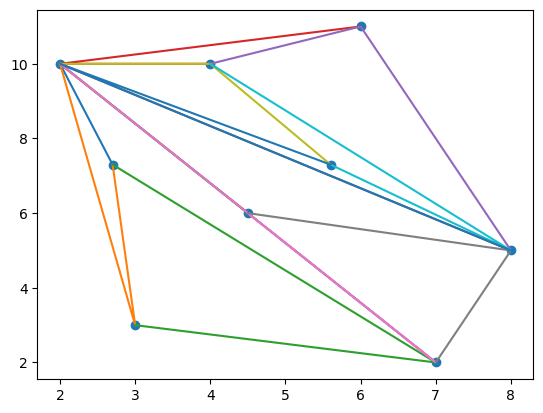

In [41]:
lpontos=[[2,10],[3,3],[4.5,6],[2.7,7.3],[5.6,7.3],[6,11],
         [7,2],[8,5],[4,10]]
k=trnglsplt(lpontos)
apontos=np.array(lpontos).T
for triang in k:
    atri=np.array(triang).T
    plt.plot(atri[0],atri[1])
plt.scatter(apontos[0],apontos[1])
plt.show()

Incremental Triangles

In [42]:
def incr_triangles(lpontos):
    lpontos.sort()
    lpontos=list(np.array(lpontos))
    lcasco=lpontos[:3]
    if np.cross(lcasco[0]-lcasco[-1],lcasco[1]-lcasco[0])<0: #se lcasco for horário
            lcasco=[lcasco[0]]+lcasco[1::][::-1] # vira antihorário
    triangs=[lcasco.copy()]
    for i,ponto in enumerate(lpontos[3:]):
        i+=3
        iposits=[]
        for j,p in enumerate(lcasco):
            vet=np.cross(ponto-lcasco[j-1],p-lcasco[j-1])
            if vet>=0:
                iposits.append(j)
        if 0 not in iposits:
            p0=iposits[0]
            index=iposits[-1]
            triangs.append([lcasco[index],lcasco[index-1],ponto])
            for index in iposits[:-1][::-1]: 
                triangs.append([lcasco[index],lcasco[index-1],ponto])
                lcasco.pop(index)
        elif len(iposits)==1:
            p0=len(lcasco)
            triangs.append([lcasco[-1],ponto,lcasco[0]])
        else:
            p0=iposits[1]
            triangs.append([lcasco[0],lcasco[-1],ponto])
            for index in iposits[1:][::-1]: 
                triangs.append([lcasco[index],lcasco[index-1],ponto])
                lcasco.pop(index)
        lcasco.insert(p0,ponto)
    return triangs#,lcasco #não repeti o primeiro ponto como no arquivo original    

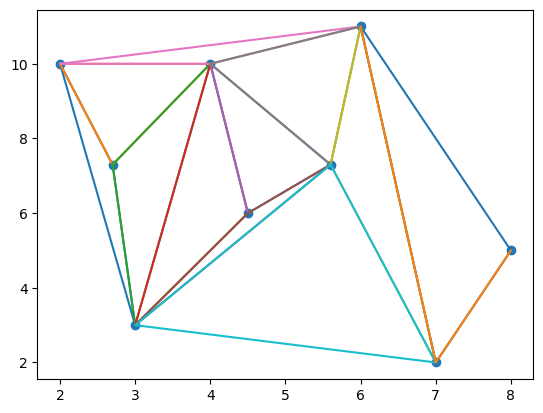

In [43]:
lpontos=[[2,10],[3,3],[4.5,6],[2.7,7.3],[5.6,7.3],[6,11],
         [7,2],[8,5],[4,10]]
inct=incr_triangles(lpontos)
apontos=np.array(lpontos).T
for triang in inct:
    atri=np.array(triang+[triang[0]]).T
    plt.plot(atri[0],atri[1])
triang=inct[-1]
atri=np.array(triang).T
plt.plot(atri[0],atri[1])
plt.scatter(apontos[0],apontos[1])
plt.show()